# Expectation value of quickselect runtime
+ date: 2018-08-27
+ slug: quickselect-complexity

## Problem
Suppose there are $n$ numbers, use [Quickselect](https://en.wikipedia.org/wiki/Quickselect) to determine $k$th smallest number. What is average runtime?

## Recursion
For our convenience, we assume there are no equal numbers. Initially, there are $n_-=k-1$ numbers smaller than target and $n_+=n-k$ numbers larger than target, which satisfy $n=n_-+n_++1$. We denote expectation value of run time for this situation by $T[n_-, n_+]$. 
For one step of `quickselect`, it takes $cn$ time to do partition with a random pivot. Then the problem falls into three cases:
+ If pivot is smaller than target, $n_-$ is reduced and falls in the range $[0, n_--1]$
+ If pivot is greater than target, $n_+$ is reduced and falls in the range $[0, n_+-1]$
+ If pivot is target, our algorithm halts, which takes constant time $d$.

With this analysis, we find recursion for $T[n_-, n_+]$:

$$T[n_-, n_+]= cn+\frac{\sum_{k=0}^{n_--1} T[k, n_+]+\sum_{k=0}^{n_+-1} T[n_-, k]+d}{n}$$

## Solution
The recursion of $T$ is equivalent to
$$nT[n_-, n_+]= cn^2+d+\sum_{k=0}^{n_--1} T[k, n_+]+\sum_{k=0}^{n_+-1} T[n_-, k]$$

Similarly we have
$$(n-1)T[n_-, n_+-1]= c(n-1)^2+d+\sum_{k=0}^{n_--1} T[k, n_+-1]+\sum_{k=0}^{n_+-2} T[n_-, k]$$
$$(n-1)T[n_--1, n_+]= c(n-1)^2+d+\sum_{k=0}^{n_--2} T[k, n_+]+\sum_{k=0}^{n_+-1} T[n_--1, k]$$
$$(n-2)T[n_--1, n_+-1]= c(n-2)^2+d+\sum_{k=0}^{n_--2} T[k, n_+-1]+\sum_{k=0}^{n_+-2} T[n_--1, k]$$

Evaluate $nT[n_-, n_+]-(n-1)T[n_-, n_+-1]-(n-1)T[n_--1, n_+]+(n-2)T[n_--1, n_+-1]$, and we find:

$$T[n_-, n_+]-T[n_-, n_+-1]-T[n_--1, n_+]+T[n_--1, n_+-1]=2c/n$$

Sum over all $(n_-, n_+)$ points, we have

\begin{align}
&\phantom{{}={}}T[n_-, n_+]-T[n_-, 0]-T[0, n_+]+T[0, 0]\\
&\approx 2c\int_{1/2}^{n_-+1/2}\int_{1/2}^{n_++1/2} \frac{dxdy}{x+y+1}\\
&\approx 2c[(n_-+n_++2)\ln (n_-+n_++2)-(n_-+2)\ln (n_-+2)-(n_++2)\ln (n_++2)+2\ln 2]\\
&\approx 2c\Big[N[-p\ln (p+1/N)-q\ln (q+1/N)]-\ln (n_-+2)(n_++2)+2\ln 2\Big]\\
&\approx 2cN(-p\ln p-q\ln q)+O(\log N)\\
&\approx 2cSN
\end{align}

where $N=n_-+n_++2, p=(n_-+1)/N, q=(n_++1)/N$. $S$ is entropy for $(p, q)$ distribution.

It is obvious that $T[n, 0]=T[0, n]=bn, T[0, 0]=d$, which gives

$$T[n_-, n_+]= (b+2cS)N$$

### $T/N$ as a function of percentage $p$
Assume $b=c=1$, then we can plot $T/N$ as function of $p$

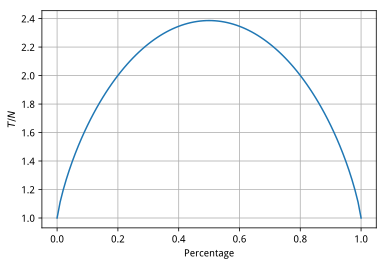

In [25]:
p=linspace(1e-6, 1-1e-6, 101)
q = 1-p
b = c = 1
plot(p, b-2*c*(p*log(p)+q*log(q)))
grid();
xlabel('Percentage')
ylabel(r'$T/N$');